In [49]:
import pandas as pd
fish_df = pd.read_csv('https://bit.ly/fish_csv_data')
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [50]:
fish_input = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [51]:
fish_target = fish_df['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [52]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
kn.score(train_scaled,train_target)
kn.score(test_scaled,test_target)

0.85

    target데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 부른다.

In [55]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [56]:
import numpy as np
prob = kn.predict_proba(test_scaled[:5]) #predict_proba를 통해 특정 class에 대한 확률을 검토할 수 있다. 순서는 기존에 target데이터 순이 아닌 kn.classes의 순서대로 뜬다.
np.round(prob,decimals= 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [57]:
sample_4th = test_scaled[3:4]
distances, indexes = kn.kneighbors(sample_4th)
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

    로지스틱 회귀는 이름은 회귀이지만 분류 모델로 선형 회귀와 동일하게 선형 방정식을 학습합니다. 

    Z가 아주 큰 음수일 때 0이 되고, Z가 아주 큰 양수 일때 1이 되도록 바꾸기 위해선 시그모이드 함수(또는 로지스틱 함수)를 이용해서 가능하다

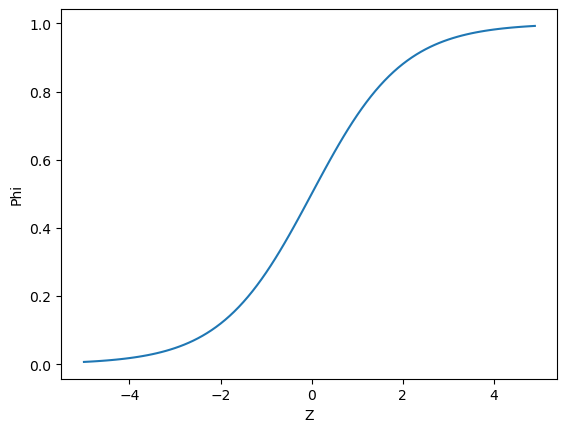

In [58]:
import matplotlib.pyplot as plt
#시그모이드 함수는 이렇게 생겼다. 
z = np.arange(-5,5,0.1)
Phi = 1/ (1+np.exp(-z))
plt.plot(z,Phi)
plt.xlabel('Z')
plt.ylabel('Phi')
plt.show()

    시그모이드 함수는 출력값(Phi)이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단합니다.

In [59]:
Char_arr = np.array(['A','B','C','D','E'])
Char_arr[[True,False,True,False,False]]

array(['A', 'C'], dtype='<U1')

In [64]:
bream_smelt_indexes = (train_target =='Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [69]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [73]:
lr.classes_#bream이 음성 클래스, smelt가 양성 클래스 

array(['Bream', 'Smelt'], dtype=object)

In [70]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [74]:
fish_df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [75]:
lr.coef_,lr.intercept_
#coef가 무엇의 계수인지 알 수 있다. 순서대로 weight~width까지

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [77]:
train_bream_smelt[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174]])

In [76]:
decisions = lr.decision_function(train_bream_smelt[:5])
decisions
#decision_function기능을 통해 선형 방정식을 반영한 결과 값(Z)를 반환하도록 하는 것이다. 

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [80]:
from scipy.special import expit#scipy를 통해 시그모이드로 변환할 수 있다.
expit(decisions)#시그모이드로 값을 변환. 시그모이드 결과 값에 따르면 bream/smelt/bream/bream/bream

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

    이를 통해 이진 분류에서 다중 분류를 수행할 것이다.

    로지스틱 회귀로 다중 분류 수행하기
    max_iter 매개변수에서 반복횟수를 지정하며, 로지스틱 회귀는 반복을 통해 계수를 설정하며 모델을 훈련하기에 충분하지 못한 경우에는 경고가 발생합니다.
    로지스틱 회귀에서 릿지 회귀와 같이 계수의 제곱을 규제합니다. 
    릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절합니다. 
    로지스틱에선 L2 규제라고도 부릅니다. 
    LogisticRegression에서는 C라는 매개변수를 통해 계수의 제곱을 규제합니다.
    C는 alpha와 반대로 작을수록 규제가 커집니다.  

In [83]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
lr.score(train_scaled,train_target)
lr.score(test_scaled,test_target)

0.925

In [87]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [85]:
prob = lr.predict_proba(test_scaled[:5])
np.round(prob, decimals=3)#나머지 데이터는 괜찮은데 4번째 데이터가 좀 확률이 아쉽네?

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [88]:
lr.coef_,lr.intercept_

(array([[-1.48986217, -1.02993738,  2.59442523,  7.70317852, -1.20029196],
        [ 0.19634317, -2.00935252, -3.78045585,  6.50474233, -1.99514592],
        [ 3.56250912,  6.34406973, -8.4900971 , -5.75745418,  3.79323748],
        [-0.1050809 ,  3.60284123,  3.93066839, -3.61707744, -1.75102734],
        [-1.40030385, -6.07531395,  5.25937344, -0.87220402,  1.86069287],
        [-1.38523809,  1.49231584,  1.39234448, -5.67720457, -4.4010109 ],
        [ 0.62163272, -2.32462296, -0.90625859,  1.71601937,  3.69354577]]),
 array([-0.09220027, -0.26297954,  3.25070805, -0.14650445,  2.65466181,
        -6.78781452,  1.38412892]))

    소프트맥스 함수 여러개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 합니다. 
    정규화된 지수함수라고도 합니다.

In [89]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions,decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [90]:
from scipy.special import softmax
proba = softmax(decisions,axis=1)
np.round(prob,decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

---

### 확률적 경사 하강법

    매일 추가되는 데이터를 활용해 모델을 새롭게 훈련하는 것도 방법일 수 있지만 이는 지속가능한 방법이 아니다. 
    매번 데이터가 조금씩 전달되는 문제를 해결하기 위해 점진적 학습, Stochastic Gradient Descent를 이용한다.

    훈련세트에서 전체 샘플이 아니라 하나의 샘플을 랜덤하게 골라 가장 가파른 길을 찾는 것, 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법
    경사 하강법에는 하나의 샘플을 골라가는 확률적 경사 하강법과 여러개를 골라가는 미니배치 경사 하강법, 전체 샘플을 이용하는 배치 경사 하강법이 있다. 이들 훈련 세트를 한번 모두 사용하면 에포크 라고 한다. 일반적으로 여러번의 에포크를 수행한다. 

    손실함수는 미분이 가능해야한다. 

In [91]:
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [92]:
fish_df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [94]:
fish_target = fish_df['Species'].to_numpy()
fish_input = fish_df[['Weight','Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [95]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,random_state=42)

In [96]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

array([[-0.88741352, -0.88741352, -0.91804565, -1.03098914, -0.90464451,
        -0.80762518],
       [-1.06924656, -1.06924656, -1.50842035, -1.54345461, -1.58849582,
        -1.93803151],
       [-0.54401367, -0.54401367,  0.35641402,  0.30663259, -0.8135697 ,
        -0.65388895],
       [-0.34698097, -0.34698097, -0.23396068, -0.22320459, -0.11905019,
        -0.12233464],
       [-0.68475132, -0.68475132, -0.51509149, -0.58801052, -0.8998784 ,
        -0.50124996],
       [ 1.70778862,  1.70778862,  0.79685229,  0.98412932,  2.49283113,
         1.31347159],
       [-1.08726098, -1.08726098, -1.67709884, -1.70848587, -1.76175528,
        -2.01154694],
       [-0.60030873, -0.60030873, -0.3089289 , -0.29269143, -0.43855288,
        -0.33056738],
       [-0.57779071, -0.57779071, -0.36515506, -0.44035097, -0.52577528,
        -0.17219833],
       [ 2.41147684,  2.41147684,  2.57734741,  2.4694106 ,  0.45038962,
         1.54627043],
       [ 0.72262512,  0.72262512,  0.46886634,  0.

In [100]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter= 10, random_state=42)
sc.fit(train_scaled,train_target)
sc.score(train_scaled,train_target), sc.score(test_scaled,test_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.773109243697479, 0.775)

In [105]:
sc.partial_fit(train_scaled,train_target) #부분적으로 추가적인 학습을 할때는 1에포크씩 이어서 훈련하게 되는데 partial_fit()으로 모델을 이어서 훈련할 수 있다.
sc.score(train_scaled,train_target), sc.score(test_scaled,test_target)

(0.8571428571428571, 0.9)

    얼마나 에포크를 진행해야 하는지는 모델이 지금 적합한 상태인지, 과소적합인지, 과대적합인지를 파악해야한다.
    훈련세트와 테스트 세트가 존재하는데 어느 순간 테스트 세트 점수는 어느 순간 감소하기 시작합니다. 이때가 모델이 과적합되기 시작하는 때이므로 우리는 이를 종료시점으로 설정하여 조기 종료 해야합니다.

In [106]:
sc = SGDClassifier(loss='log_loss',random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

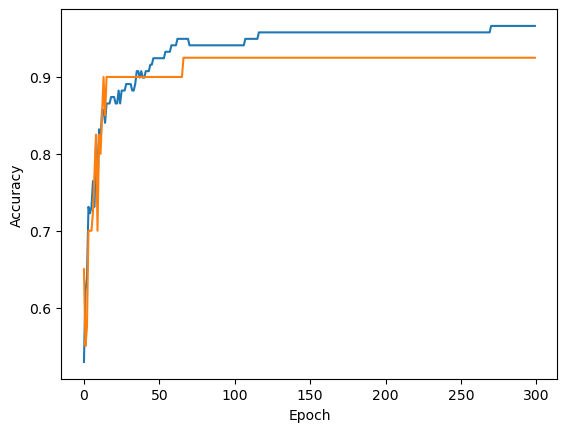

In [107]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show()

In [108]:
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None, random_state=42) #tol 매개변수에서 향상될 최솟값을 지정합니다.
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [110]:
sc = SGDClassifier(loss='hinge',max_iter= 100,tol=None, random_state=42)
sc.fit(train_scaled,train_target)
sc.score(train_scaled,train_target), sc.score(test_scaled,test_target)

(0.9495798319327731, 0.925)